In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dfr = pd.read_csv("data/runs.csv", parse_dates=['timeStamp'])
dfr.info()
dfr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   scenarioId    4680 non-null   int64  
 1   trailId       4680 non-null   int64  
 2   simulationId  4680 non-null   object 
 3   timeStamp     4680 non-null   object 
 4   providerId    4680 non-null   object 
 5   eventId       4680 non-null   object 
 6   step          4680 non-null   int64  
 7   runConfig     4680 non-null   object 
 8   runNumber     4680 non-null   int64  
 9   error         0 non-null      float64
dtypes: float64(1), int64(4), object(5)
memory usage: 365.8+ KB


,scenarioId,trailId,simulationId,timeStamp,providerId,eventId,step,runConfig,runNumber,error
0,1,0,tictoc-0c42248c,2021-09-15 11:16:27.032441+02:00,patricks-mbp-02434787,0xd0a25462,1,TicToc18,5,NaN
1,1,0,tictoc-0c42248c,2021-09-15 11:16:27.034596+02:00,patricks-mbp-02434787,0xec342a97,1,TicToc18,3,NaN
2,1,0,tictoc-0c42248c,2021-09-15 11:16:27.035204+02:00,patricks-mbp-02434787,0xa2f8fb25,1,TicToc18,6,NaN
3,1,0,tictoc-0c42248c,2021-09-15 11:16:27.035369+02:00,patricks-mbp-02434787,0xb5e038f3,1,TicToc18,2,NaN
4,1,0,tictoc-0c42248c,2021-09-15 11:16:27.036464+02:00,patricks-mbp-02434787,0x85477213,1,TicToc18,4,NaN


In [3]:
dft = pd.read_csv("data/transfers.csv", parse_dates=['timeStamp'])
dft.info()
dft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4820 entries, 0 to 4819
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   scenarioId    4820 non-null   int64                                
 1   trailId       4820 non-null   int64                                
 2   simulationId  4820 non-null   object                               
 3   timeStamp     4820 non-null   datetime64[ns, pytz.FixedOffset(120)]
 4   providerId    4820 non-null   object                               
 5   eventId       4820 non-null   object                               
 6   step          4820 non-null   int64                                
 7   direction     4820 non-null   object                               
 8   file          4820 non-null   object                               
 9   transferred   4820 non-null   int64                                
 10  error       

,scenarioId,trailId,simulationId,timeStamp,providerId,eventId,step,direction,file,transferred,error
0,1,0,tictoc-0c42248c,2021-09-15 11:16:19.320719+02:00,patricks-mbp-02434787,0xa7d45d71,1,Upload,source.tgz,0,NaN
1,1,0,tictoc-0c42248c,2021-09-15 11:16:19.368700+02:00,patricks-mbp-02434787,0xa7d45d71,2,Upload,source.tgz,433624,NaN
2,1,0,tictoc-0c42248c,2021-09-15 11:16:26.798320+02:00,patricks-mbp-02434787,0x7d8e760,1,Download,binary/binary/darwin_amd64.tgz.tgz,0,NaN
3,1,0,tictoc-0c42248c,2021-09-15 11:16:26.838090+02:00,patricks-mbp-02434787,0x7d8e760,2,Download,binary/binary/darwin_amd64.tgz.tgz,2097152,NaN
4,1,0,tictoc-0c42248c,2021-09-15 11:16:32.229106+02:00,patricks-mbp-02434787,0xfd7e21e9,1,Download,results/TicToc18_6.tgz,0,NaN


In [4]:
dfa = pd.read_csv("data/actions.csv", parse_dates=['timeStamp'])
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7950 entries, 0 to 7949
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   scenarioId    7950 non-null   int64  
 1   trailId       7950 non-null   int64  
 2   simulationId  7950 non-null   object 
 3   timeStamp     7950 non-null   object 
 4   deviceId      7950 non-null   object 
 5   action        7950 non-null   object 
 6   meta          7950 non-null   object 
 7   eventId       7950 non-null   object 
 8   step          7950 non-null   int64  
 9   error         0 non-null      float64
dtypes: float64(1), int64(3), object(6)
memory usage: 621.2+ KB


,scenarioId,trailId,simulationId,timeStamp,deviceId,action,meta,eventId,step,error
0,1,0,tictoc-0c42248c,2021-09-15 11:16:19.082171+02:00,consumer,Compress,source,0x18cc5d2b,1,NaN
1,1,0,tictoc-0c42248c,2021-09-15 11:16:19.231778+02:00,consumer,Compress,source,0x18cc5d2b,2,NaN
2,1,0,tictoc-0c42248c,2021-09-15 11:16:19.643755+02:00,patricks-mbp-02434787,Compile,darwin_amd64,0x9d1df196,1,NaN
3,1,0,tictoc-0c42248c,2021-09-15 11:16:26.608658+02:00,patricks-mbp-02434787,Compile,darwin_amd64,0x9d1df196,2,NaN
4,1,0,tictoc-0c42248c,2021-09-15 11:16:26.633905+02:00,patricks-mbp-02434787,Compress,binary/darwin_amd64.tgz,0x27df66db,1,NaN


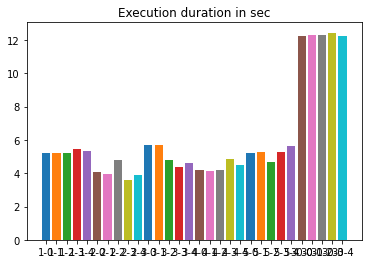

In [5]:
scenarios = dfr.scenarioId.sort_values().unique()

plt.title("Execution duration in sec")

for scenario in scenarios:
    for trail in dfr.trailId.unique():
        execution_start = dfr.loc[(dfr.trailId == trail) & (dfr.scenarioId == scenario) & (dfr.step == 1)].sort_values(by=['eventId'])
        execution_end   = dfr.loc[(dfr.trailId == trail) & (dfr.scenarioId == scenario) & (dfr.step == 2)].sort_values(by=['eventId'])

        durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)
        mean = durations.mean()
        std = durations.std()

        plt.bar(f"{scenario}-{trail}", mean.total_seconds())


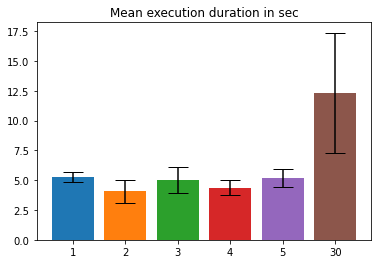

In [6]:
scenarios = dfr.scenarioId.sort_values().unique()

plt.title("Mean execution duration in sec")

for scenario in scenarios:
    execution_start = dfr.loc[(dfr.scenarioId == scenario) & (dfr.step == 1)].sort_values(by=['eventId'])
    execution_end   = dfr.loc[(dfr.scenarioId == scenario) & (dfr.step == 2)].sort_values(by=['eventId'])

    durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)
    mean = durations.mean()
    std = durations.std()

    plt.bar(f"{scenario}", mean.total_seconds(), yerr=std.total_seconds(), capsize=10)


Compile ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5'] [36.295477 33.819754 28.771627 35.709244 27.515753]
Compress ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5'] [25.052835 26.069677 25.502951 28.971848 29.650855]
Extract ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5'] [14.029474  9.326938  9.420884  9.336925  9.281346]


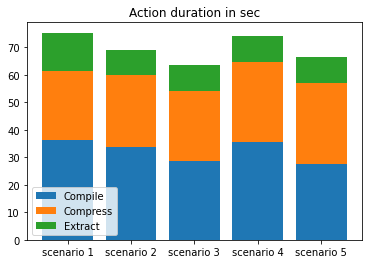

In [7]:
scenarios = dfa.scenarioId.sort_values().unique()
actions = dfa.action.sort_values().unique()

plt.title("Action duration in sec")

bottom = np.zeros(len(scenarios))
for action in actions:
    labels = []
    vals = np.zeros(len(scenarios))

    for inx, scenario in enumerate(scenarios):
        execution_start = dfa.loc[(dfa.scenarioId == scenario) & (dfa.action == action) & (dfa.step == 1)].sort_values(by=['eventId'])
        execution_end   = dfa.loc[(dfa.scenarioId == scenario) & (dfa.action == action) & (dfa.step == 2)].sort_values(by=['eventId'])

        durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)
        val = durations.sum()

        labels.append(f"scenario {scenario}")
        vals[inx] = val.total_seconds()

    plt.bar(labels, vals, label=action, bottom=bottom)
    print(action, labels, vals)
    bottom += vals
    
plt.legend()

    

scenario-2 direction=Upload tranfered=2191458 sum=6.658519 val=3.2912093515089467
scenario-2 direction=Download tranfered=828375040 sum=38031.406199 val=0.2178134133840629
scenario-3 direction=Upload tranfered=2225126 sum=5.484699 val=4.056970127257667
scenario-3 direction=Download tranfered=828375040 sum=36186.405238 val=0.22891885351742772
scenario-4 direction=Upload tranfered=2213820 sum=5.744628 val=3.853722120910179
scenario-4 direction=Download tranfered=828375040 sum=30882.054692 val=0.26823831777442925
scenario-5 direction=Upload tranfered=2182609 sum=7.284792 val=2.9961171163157436
scenario-5 direction=Download tranfered=828375040 sum=26214.261211 val=0.31600167303299703


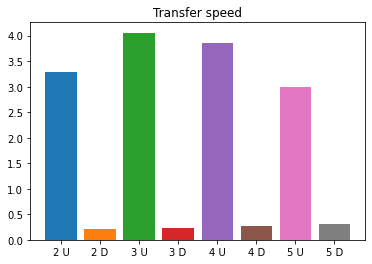

In [8]:
#scenarios = dft.scenarioId.sort_values().unique()
scenarios = [2,3,4,5]

directions = dft.direction.unique()

plt.title("Transfer speed")

for scenario in scenarios:    
    for inx, direction in enumerate(directions):
        tranfer_start = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction) & (dft.step == 1)].sort_values(by=['eventId'])
        tranfer_end   = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction) & (dft.step == 2)].sort_values(by=['eventId'])
        tranfered     = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction)].transferred.sum()

        durations = pd.to_timedelta(tranfer_end.timeStamp.values - tranfer_start.timeStamp.values)
        val = tranfered / durations.sum().total_seconds() / 100000

        print(f"scenario-{scenario} direction={direction} tranfered={tranfered} sum={durations.sum().total_seconds()} val={val}")

        plt.bar(f"{scenario} {direction[0]}", val)
        

Execution ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5', 'scenario 30'] [2063.561917 1587.668408 1962.952295 1703.823995 2031.528686 4800.253605]
Upload ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5', 'scenario 30'] [ 0.221235  6.658519  5.484699  5.744628  7.284792 37.285707]
Download ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5', 'scenario 30'] [1.99705600e+01 3.80314062e+04 3.61864052e+04 3.08820547e+04
 2.62142612e+04 4.13552075e+02]
Compile ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5', 'scenario 30'] [36.295477 33.819754 28.771627 35.709244 27.515753  0.      ]
Compress ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5', 'scenario 30'] [25.052835 26.069677 25.502951 28.971848 29.650855  0.      ]
Extract ['scenario 1', 'scenario 2', 'scenario 3', 'scenario 4', 'scenario 5', 'scenario 30'] [14.029474  9.326938  9.420884  9.336925  9.281346  0.      ]


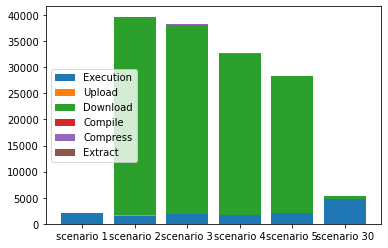

In [12]:
scenarios = dfr.scenarioId.sort_values().unique()
#scenarios = [2, 3, 4, 5]

labels = []
sums = np.zeros(len(scenarios))

for inx, scenario in enumerate(scenarios):    
    exe_start     = dfr.loc[(dfr.scenarioId == scenario) & (dfr.step == 1)].sort_values(by=['eventId'])
    exe_end       = dfr.loc[(dfr.scenarioId == scenario) & (dfr.step == 2)].sort_values(by=['eventId'])
    exe_durations = pd.to_timedelta(exe_end.timeStamp.values - exe_start.timeStamp.values)
    su = exe_durations.sum().total_seconds()
    sums[inx] = su
    labels.append(f"scenario {scenario}")

print("Execution", labels, sums)
plt.bar(labels, sums, label="Execution")

bottom = np.zeros(len(scenarios))
bottom += sums

#'''
for direction in dft.direction.unique():
    labels = []
    sums = np.zeros(len(scenarios))

    for inx, scenario in enumerate(scenarios):    
        dtranfer_start     = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction) & (dft.step == 1)].sort_values(by=['eventId'])
        dtranfer_end       = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction) & (dft.step == 2)].sort_values(by=['eventId'])
        dtranfer_durations = pd.to_timedelta(dtranfer_end.timeStamp.values - dtranfer_start.timeStamp.values)
        su = dtranfer_durations.sum().total_seconds()
        sums[inx] = su
        labels.append(f"scenario {scenario}")

    print(direction, labels, sums)
    plt.bar(labels, sums, label=direction, bottom=bottom)
    bottom += sums
#'''

for action in actions:
    labels = []
    vals = np.zeros(len(scenarios))

    for inx, scenario in enumerate(scenarios):
        execution_start = dfa.loc[(dfa.scenarioId == scenario) & (dfa.action == action) & (dfa.step == 1)].sort_values(by=['eventId'])
        execution_end   = dfa.loc[(dfa.scenarioId == scenario) & (dfa.action == action) & (dfa.step == 2)].sort_values(by=['eventId'])

        durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)
        val = durations.sum()

        labels.append(f"scenario {scenario}")
        vals[inx] = val.total_seconds()

    plt.bar(labels, vals, label=action, bottom=bottom)
    print(action, labels, vals)
    bottom += vals

plt.legend()
    